# Mobine Game Churn Prediction

## Imports

In [140]:
# Pandas and Numpy for data manipulation
import pandas as pd
import numpy as np

# Set display up to 30 columns of a dataframe
pd.set_option('display.max_columns', 30)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Spliting data into training and testing
from sklearn.model_selection import train_test_split

# Scaling features
from sklearn.preprocessing import MinMaxScaler

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine
from sklearn.svm import SVC

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Grid search cross validation, Randomized search cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ROC curve, AUC score and classification report
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# visualize dicision tree
from sklearn import tree
import graphviz

# LIME for explaining predictions
import lime
import lime.lime_tabular

# Data Collection
<p>We only interested in active users. Active users are defined as played at least once in 30 days. We want to train a machine learning algorithm to learn the active users' behavior in order to predict whether the user will churn in future.</p>
<p>We define churn as not played even one time in successive 30 days. </p>
<p>We collect active user behavior in 30 days. In the following 30 days, churn behavior is extracted using our defined standard. 

# $\rm I.$ Data Cleaning and Formating

## Load in the Data and Examine
* Make 'DEVICEID' as index coulumn

In [2]:
df = pd.read_csv('dataset/result.csv', index_col='DEVICEID')

In [3]:
# Display top of dataframe
df.head()

,FBCONNECT,LIFETIME,TOTALPLAYDAYS,TOTALIAP,TOTALIAPVALUE,TOTALVIDEO,TOTALSTARS,STARS,MAXLEVEL,LEVELINCREASE,PLAYDAYS,SESSIONS,SESSIONLENGTH,IAP,IAPVALUE,VIDEO,WINS,FAILS,USEBOOSTER,WIN_EXTRAMOVES,LOSE_EXTRAMOVES,COINSSPENT,COINSEARNED,COINSBALANCE,CHURNED
DEVICEID,,,,,,,,,,,,,,,,,,,,,,,,,
84397248-B04A-4A28-9C5C-B4C14E15AAB0,0,51,3,3,27.97,4,115.0,66,60.0,50.0,3,5,5428.41,3,27.97,4,39,0,10,83,0,290706,524805,265175.0,1
F91C6715-767C-4FCE-9A4D-D762FB8DFDAB,1,202,188,0,0.00,932,783.0,322,360.0,45.0,28,61,56508.63,0,0.00,254,148,169,141,8,2,1258950,1341107,15673.0,0
90443BDC-8AFD-4073-A614-E6DDD9A4DACB,0,49,4,0,0.00,0,3.0,3,2.0,0.0,3,4,248.55,0,0.00,0,1,0,0,0,0,150,327,10177.0,0
80F9E0FA-1484-4165-8BB9-2B89D56A1478,1,147,6,0,0.00,0,53.0,4,21.0,0.0,1,1,374.39,0,0.00,0,2,0,1,1,0,3000,9222,18222.0,1
3FEED5D6-783B-49B4-9B34-06D78BF6BB3A,0,125,10,0,0.00,0,64.0,5,26.0,0.0,1,1,583.64,0,0.00,0,4,1,0,1,0,8400,13822,29922.0,0


## Feature Columns Explaine
* FBCONNECT: FACEBOOK CONNECTED: 1; NOT CONNECTED: 0
* LIFETIME: USER LIFETIME EXISTING DAYS
* TOTALPLAYDAYS: USER TOTAL LIFETIME PLAYED DAYS
* TOTALIAP: TOTAL IN APP PURCHASE
* TOTALIAPVALUE: TOTAL IN APP PURCHASE VALUES IN DOLLARS
* TOTALVIDEO: TOTAL REWARD VIDEOS VIEWED
* TOTALSTARS: TOTAL STARS COLLECTED
* STARS: STARS COLLECTED IN THE DATA COLLECTED PERIOD
* MAXLEVEL: MAX LEVEL USER ACHIEVED SO FAR
* LEVELINCREASE: LEVEL INCRESED IN THE DATA COLLECTED PERIOD
* PLAYEDAYS: PLAY DAYS IN DATA COLLECTED PERIOD
* SESSRIONS: SESSIONS PALYED IN DATA COLLECTED PERIOD
* SESSRIONLENGTH: SESSTION LENGTH IN SECONDS IN DATA COLLECTED PERIOD
* IAP: IN APP PURCHASE IN DATA COLLECTED PERIOD
* IAPVALUE: IN APP PURCHASE IN DOLLARS IN DATA COLLECTED PERIOD
* VIDEO: REWARD VIDEO VIEWED IN DATA COLLECTED PERIOD
* WINS: WIN TIMES IN DATA COLLECTED PERIOD
* FAILS: FAIL TIMES IN DATA COLLECTED PERIOD
* USEBOOSTER: NUMBER OF BOOSTER USED IN DATA COLLECTED PERIOD
* WIN_EXTRAMOVES: NUMBER OF EXTRA MOVES USED IN WIN GAMES IN DATA COLLECTED PERIOD
* LOSE_EXTRAMOVES: NUMBER OF TEXTRA MOVES USED IN LOOSE GAMES DATA COLLECTED PERIOD
* COINSPENT: GAME CURRENCY SPENT IN DATA COLLECTED PERIOD 
* COINEARNED: GAME CURRENCY EARNED IN DATA COLLECTED PERIOD
* COINBALANCE: CURRENT GAME BALLENCE
* CHURNED: CHURNED: 1, NOT CHURNED: 0

## Data Types and Missing Values
* All features data columns are numerical type, either 'int64' or 'foloat64'
* There are missing values found in several columns

In [4]:
# See columns data typse and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 84397248-B04A-4A28-9C5C-B4C14E15AAB0 to 7B1D08A8-8C6C-4EBC-9F36-DA7971A256F5
Data columns (total 25 columns):
FBCONNECT          51042 non-null int64
LIFETIME           51042 non-null int64
TOTALPLAYDAYS      51042 non-null int64
TOTALIAP           51042 non-null int64
TOTALIAPVALUE      51042 non-null float64
TOTALVIDEO         51042 non-null int64
TOTALSTARS         51025 non-null float64
STARS              51042 non-null int64
MAXLEVEL           51008 non-null float64
LEVELINCREASE      46844 non-null float64
PLAYDAYS           51042 non-null int64
SESSIONS           51042 non-null int64
SESSIONLENGTH      51040 non-null float64
IAP                51042 non-null int64
IAPVALUE           51042 non-null float64
VIDEO              51042 non-null int64
WINS               51042 non-null int64
FAILS              51042 non-null int64
USEBOOSTER         51042 non-null int64
WIN_EXTRAMOVES     51042 non-null int64
LOSE_EXTRAMOVES   

## Statistics for Each Column
* Column 'LEVELINCREASE' is suspicious,  the min is -569

In [5]:
# See columns data distribution
df.describe()

,FBCONNECT,LIFETIME,TOTALPLAYDAYS,TOTALIAP,TOTALIAPVALUE,TOTALVIDEO,TOTALSTARS,STARS,MAXLEVEL,LEVELINCREASE,PLAYDAYS,SESSIONS,SESSIONLENGTH,IAP,IAPVALUE,VIDEO,WINS,FAILS,USEBOOSTER,WIN_EXTRAMOVES,LOSE_EXTRAMOVES,COINSSPENT,COINSEARNED,COINSBALANCE,CHURNED
count,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51025.000000,51042.000000,51008.000000,46844.000000,51042.000000,51042.000000,51040.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,51042.000000,5.104200e+04,5.104200e+04,5.052700e+04,51042.000000
mean,0.288664,101.033698,34.586752,0.481035,3.372783,50.984209,147.154787,46.894734,55.900545,7.667236,6.142765,15.074801,6428.903646,0.097488,0.614375,10.086439,21.111281,21.983661,5.224364,5.575017,1.238314,1.128338e+05,1.248808e+05,2.703510e+04,0.501548
std,0.453146,90.336103,59.136907,3.757944,36.067100,216.789604,190.073648,71.109517,80.330120,38.508506,7.312126,33.084629,13846.863841,0.929194,6.791877,37.939335,34.936610,54.118216,18.167019,13.167478,4.389491,2.850662e+05,3.159019e+05,1.228747e+05,0.500003
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-569.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,44.000000,3.000000,0.000000,0.000000,0.000000,41.000000,9.000000,13.000000,0.000000,1.000000,2.000000,792.722500,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,4.750000e+03,1.061450e+04,3.788500e+03,0.000000
50%,0.000000,51.000000,7.000000,0.000000,0.000000,1.000000,75.000000,31.000000,26.000000,3.000000,3.000000,5.000000,2514.920000,0.000000,0.000000,0.000000,13.000000,2.000000,0.000000,1.000000,0.000000,2.728600e+04,3.386100e+04,1.294800e+04,1.000000
75%,1.000000,130.000000,37.000000,0.000000,0.000000,12.000000,175.000000,63.000000,56.000000,15.000000,7.000000,13.000000,6196.205000,0.000000,0.000000,3.000000,26.000000,17.000000,3.000000,6.000000,0.000000,9.200000e+04,9.648825e+04,2.192450e+04,1.000000
max,1.000000,562.000000,469.000000,175.000000,3499.390000,6191.000000,1260.000000,2819.000000,570.000000,359.000000,30.000000,677.000000,394477.590000,55.000000,505.880000,1578.000000,1309.000000,1275.000000,870.000000,569.000000,174.000000,7.767775e+06,1.020603e+07,7.243755e+06,1.000000


## Missing Values

In [6]:
# Import function to generate missing value percentage table
from missing_value.missing_values_table import missing_values_table

In [7]:
missing_values_table(df)

Your slelected dataframe has 25 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
LEVELINCREASE,4198,8.22
COINSBALANCE,515,1.01
MAXLEVEL,34,0.07
TOTALSTARS,17,0.03
SESSIONLENGTH,2,0.00


In [8]:
# Number of LEVELINCREASE is negative 
df.LEVELINCREASE[df['LEVELINCREASE'] < 0].count()

3237

Negative LEVELINCREASE is abnormal, we decide to drop this column

In [9]:
# Drop LEVELINCREASE
df.drop(columns=['LEVELINCREASE'], inplace=True)

In [10]:
# Fill COINBALANCE with median
df.COINSBALANCE = df.COINSBALANCE.fillna(df['COINSBALANCE'].median())

In [11]:
# Drop null value in TOTALSTARS and SESSIONLENGTH
df.dropna(inplace=True)

In [12]:
# Verify there is no missing value left
missing_values_table(df)

Your slelected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# $\rm II.$ Exploratoty Data Analysis

## Churn Distribution

In [13]:
# Churned user count
df.CHURNED[df['CHURNED'] == 1].count()

25581

In [14]:
# Not Churned user count
df.CHURNED[df['CHURNED'] == 0].count()

25425

Text(0.5,1,'Churn Distribution')

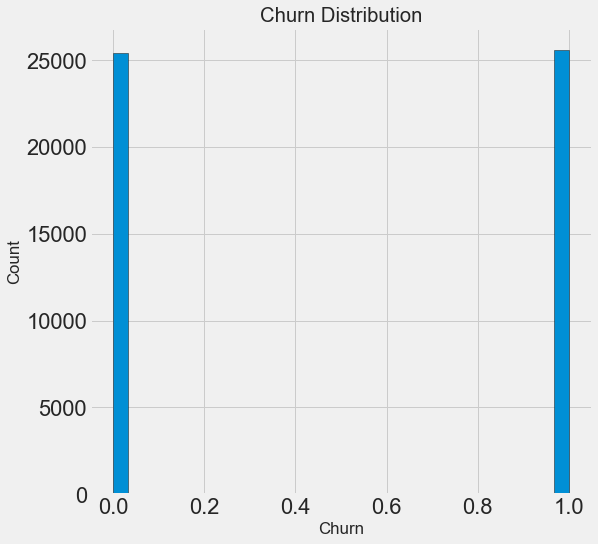

In [15]:
figsize(8,8)

# Histogram of the churn
plt.style.use('fivethirtyeight')
plt.hist(df['CHURNED'], bins=30, edgecolor='k');
plt.xlabel('Churn');plt.ylabel('Count');
plt.title('Churn Distribution')

## Facebook Connection Distribution 

Text(0.5,1,'Facebook Connection Distribution')

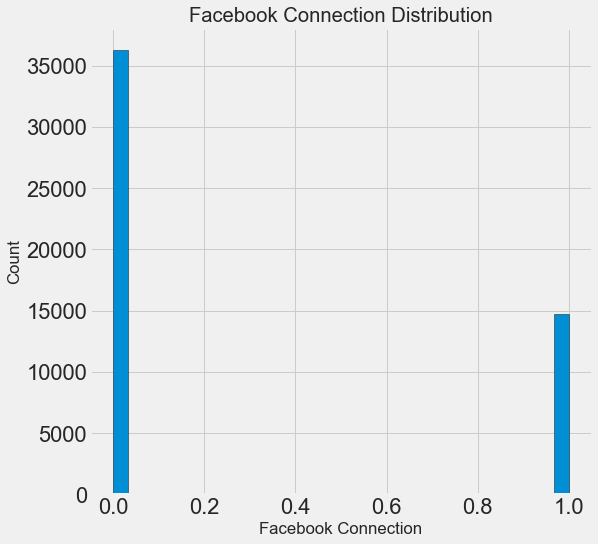

In [16]:
figsize(8,8)

# Histogram 
plt.hist(df['FBCONNECT'], bins=30, edgecolor='k');
plt.xlabel('Facebook Connection');plt.ylabel('Count');
plt.title('Facebook Connection Distribution')

## Lifetime Distribution

Text(0.5,1,'Life Time Existing Days Distribution')

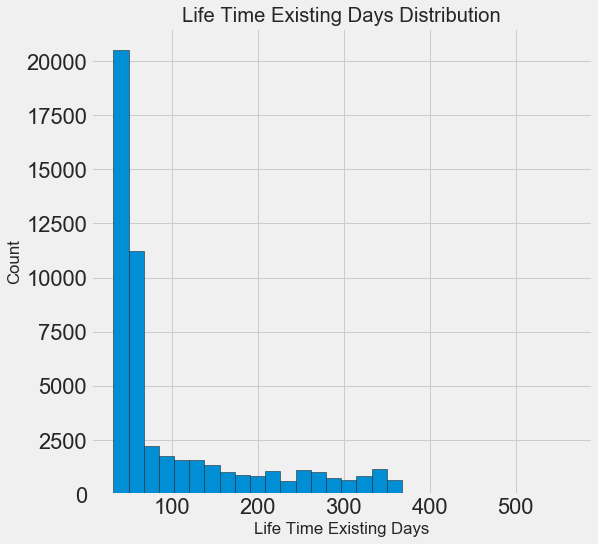

In [17]:
figsize(8,8)

# Histogram
plt.hist(df['LIFETIME'], bins=30, edgecolor='k');
plt.xlabel('Life Time Existing Days');plt.ylabel('Count');
plt.title('Life Time Existing Days Distribution')

## Total Played Days

Text(0.5,1,'Total Play Days Distribution')

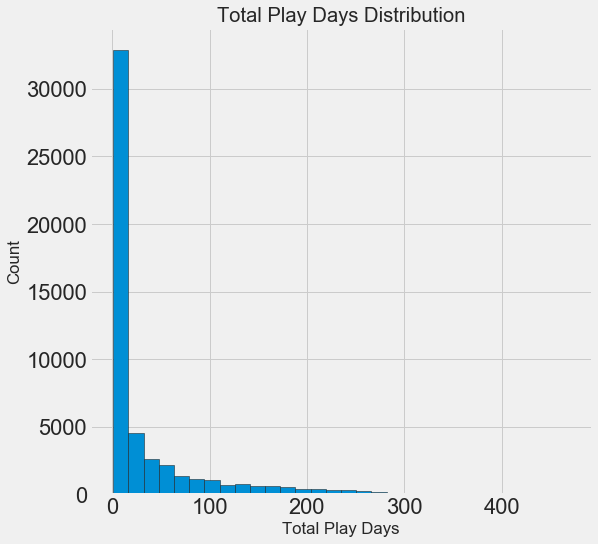

In [18]:
figsize(8,8)

# Histogram
plt.hist(df['TOTALPLAYDAYS'], bins=30, edgecolor='k');
plt.xlabel('Total Play Days');plt.ylabel('Count');
plt.title('Total Play Days Distribution')

## Total In App Purchase Distribution

In [19]:
# Number of users that IAP purchase is 0
user_life_zero_IAP = df.TOTALIAP[df['TOTALIAP'] == 0].count()
user_life_zero_IAP

47083

In [20]:
# Percent of in app purchase users
print('The percentage of users ever made in app purchase is {0: .2f}%'.format((len(df) - user_life_zero_IAP)/len(df) * 100))

The percentage of users ever made in app purchase is  7.69%


Text(0.5,1,'In App Purchase Distribution')

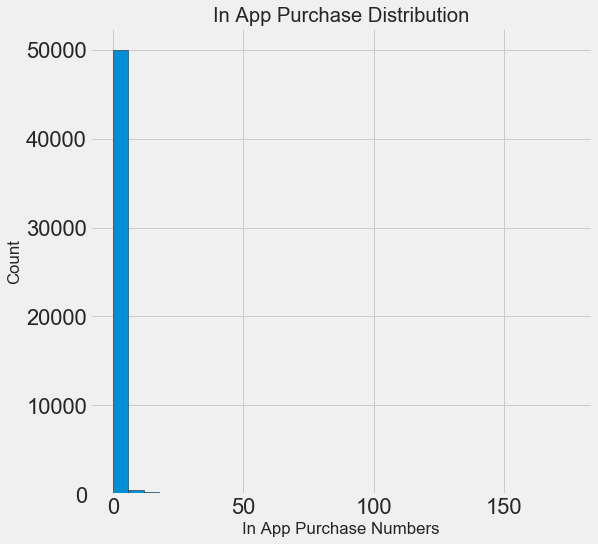

In [21]:
figsize(8,8)

# Histogram
plt.hist(df['TOTALIAP'], bins=30, edgecolor='k');
plt.xlabel('In App Purchase Numbers');plt.ylabel('Count');
plt.title('In App Purchase Distribution')

## Total In App Purchase Values Distribution

* Users spent the most
* The one spent most is $3499

In [22]:
df['TOTALIAPVALUE'].sort_values().tail(10)

DEVICEID
BCB06F1C-B5C2-41A1-90A3-80C3D22AF10F    1017.30
11CB9BDC-A620-4733-9F4D-340D91D804AA    1055.40
1F193483-1A0C-4D23-827C-8E4EBE290C2C    1092.72
83FD2334-6688-4D9C-BB18-5D4B49A42A98    1258.45
05B8F4FF-90E7-4E28-870B-05A67039CDA1    1382.29
B32E2A34-E254-4F33-AFDB-CFDF955FD426    1385.33
0393D744-8F90-4E37-BD75-477D052B2B2D    1444.24
9A8CED3B-E56B-4CCB-BDAC-68FE14EC8B19    1972.36
B6906E35-2045-48B9-9DB3-5F7EF2D4D9CF    2340.54
9FD8A0FE-8B91-49AF-A7D9-1ADA3AB5F7B2    3499.39
Name: TOTALIAPVALUE, dtype: float64

Text(0.5,1,'In App Purchase Value Distribution')

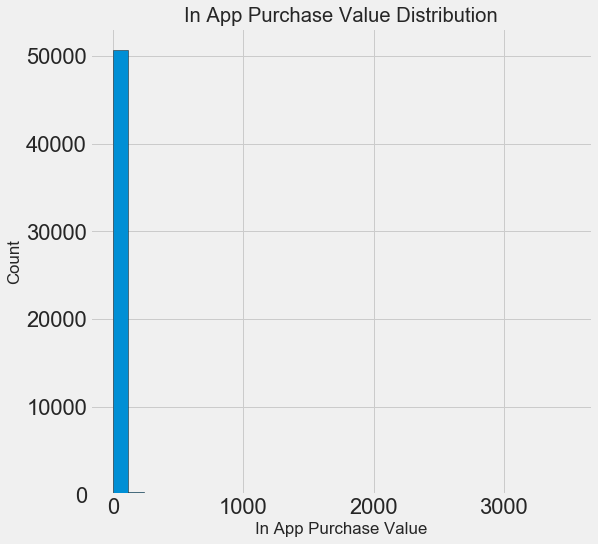

In [23]:
figsize(8,8)

# Histogram
plt.hist(df['TOTALIAPVALUE'], bins=30, edgecolor='k');
plt.xlabel('In App Purchase Value');plt.ylabel('Count');
plt.title('In App Purchase Value Distribution')

## Total Watched Reward Videos Distribution

In [24]:
# Number of users that reward video watch is 0
user_life_zero_video = df.TOTALVIDEO[df['TOTALVIDEO'] == 0].count()
user_life_zero_video

20642

* An outlier watched total 6191 reward videos
* No In App Purchase
* Coin Balance is low
* Churned

In [25]:
df[df['TOTALVIDEO'] == 6191]

,FBCONNECT,LIFETIME,TOTALPLAYDAYS,TOTALIAP,TOTALIAPVALUE,TOTALVIDEO,TOTALSTARS,STARS,MAXLEVEL,PLAYDAYS,SESSIONS,SESSIONLENGTH,IAP,IAPVALUE,VIDEO,WINS,FAILS,USEBOOSTER,WIN_EXTRAMOVES,LOSE_EXTRAMOVES,COINSSPENT,COINSEARNED,COINSBALANCE,CHURNED
DEVICEID,,,,,,,,,,,,,,,,,,,,,,,,
EC28F78B-CE50-4757-A6FA-0200D465F4AD,1,163,167,0,0.0,6191,1077.0,560,360.0,28,514,172440.25,0,0.0,1189,295,428,487,117,98,3758807,3855286,477.0,0


* Users watched the most videos

In [26]:
df['TOTALVIDEO'].sort_values().tail(10)

DEVICEID
5A047CFA-77FC-4643-8920-2B0770152CF3    4748
6B4C2713-C9B6-4C05-893F-D87B328FB3D9    4801
7DA1F412-0BBC-429C-8AD8-C3D429E470AE    4943
FC2E16EA-6DC6-4BAA-A3A6-927717656796    5022
687CCFAC-F46F-48B4-9B84-FCD2A9BA2652    5084
C71638E3-4FBF-4F55-88E3-73593D15C1F4    5335
35CB9E4A-6A51-4BFC-9E52-D695D980C867    5374
87728A36-3ED6-4C52-AD48-4CF81BA16045    5423
0BC0AC90-06F0-4B18-B6DA-C0F7EFBB1D52    5669
EC28F78B-CE50-4757-A6FA-0200D465F4AD    6191
Name: TOTALVIDEO, dtype: int64

Text(0.5,1,'Reward Video Distribution')

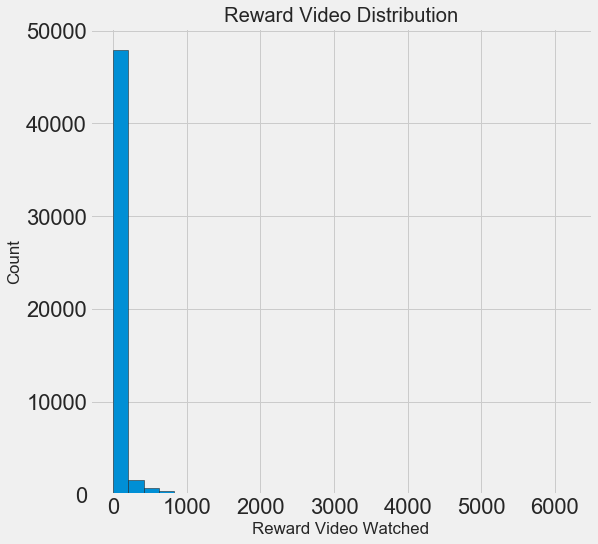

In [27]:
figsize(8,8)

# Histogram
plt.hist(df['TOTALVIDEO'], bins=30, edgecolor='k');
plt.xlabel('Reward Video Watched');plt.ylabel('Count');
plt.title('Reward Video Distribution')

## Total Stars Distribution

Text(0.5,1,'Total Stars Distribution')

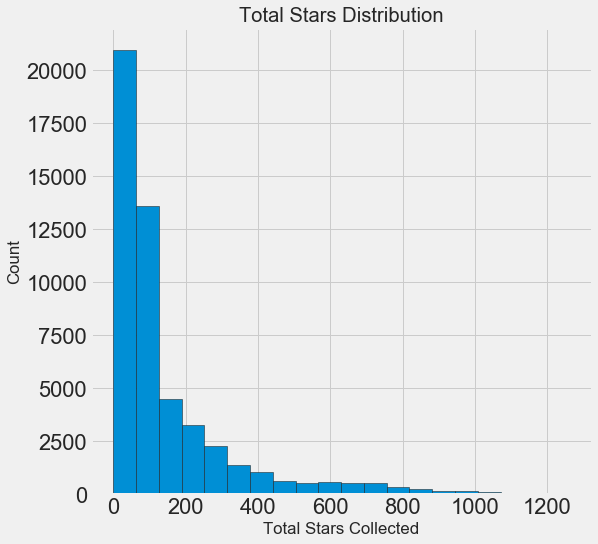

In [28]:
figsize(8,8)

# Histogram
plt.hist(df['TOTALSTARS'].dropna(), bins=20, edgecolor='k');
plt.xlabel('Total Stars Collected');plt.ylabel('Count');
plt.title('Total Stars Distribution')

## Max Level Distribution

Text(0.5,1,'Max Level Distribution')

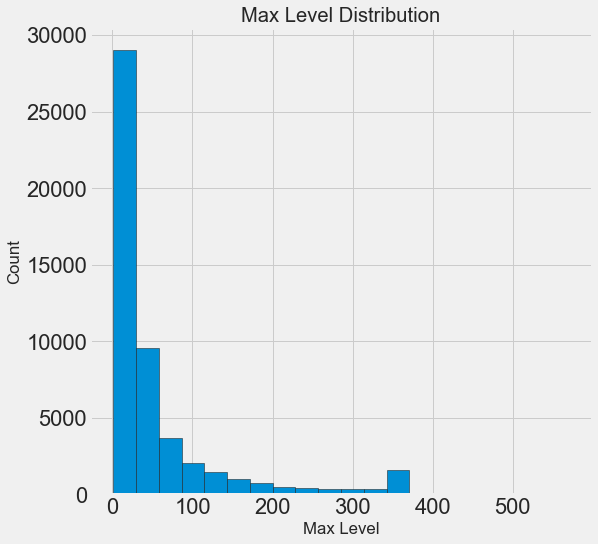

In [29]:
figsize(8,8)

# Histogram
plt.hist(df['MAXLEVEL'].dropna(), bins=20, edgecolor='k');
plt.xlabel('Max Level');plt.ylabel('Count');
plt.title('Max Level Distribution')

## Session Distribution

In [30]:
# Session equals to 1
df.SESSIONS[df['SESSIONS']==1].count()

9960

In [31]:
# Session less than 5
df.SESSIONS[df['SESSIONS'] <= 5].count()

27846

Text(0.5,1,'Session Distribution')

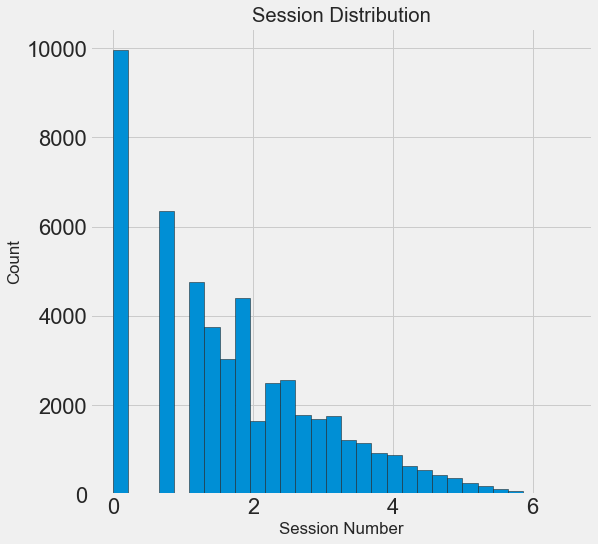

In [32]:
figsize(8,8)

# Histogram
plt.hist(df.SESSIONS.dropna().apply(np.log), bins=30, edgecolor='k');
plt.xlabel('Session Number');plt.ylabel('Count');
plt.title('Session Distribution')

## Session Length Distribution

Text(0.5,1,'Session Length Distribution')

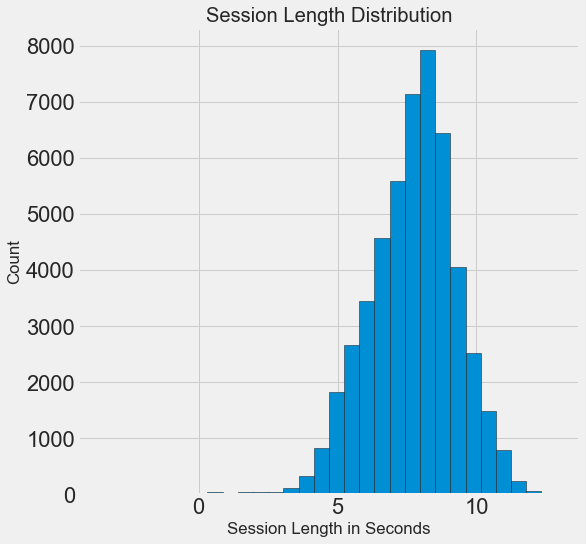

In [33]:
figsize(8,8)

# Histogram
plt.hist(df.SESSIONLENGTH[df['SESSIONLENGTH'] !=0].dropna().apply(np.log), bins=30, edgecolor='k');
plt.xlabel('Session Length in Seconds');plt.ylabel('Count');
plt.title('Session Length Distribution')

## Wins Distribution

In [34]:
# zero wins number
df.WINS[df['WINS']==0].count()

3397

Text(0.5,1,'Wins Distribution')

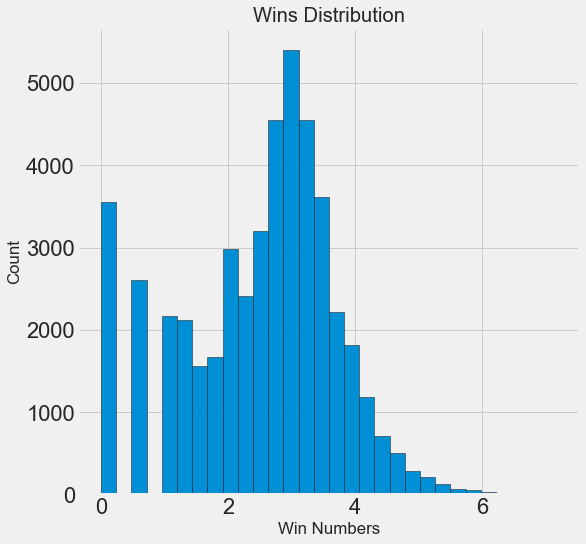

In [35]:
figsize(8,8)

# Histogram
plt.hist(df.WINS[df['WINS']!=0].dropna().apply(np.log), bins=30, edgecolor='k');
plt.xlabel('Win Numbers');plt.ylabel('Count');
plt.title('Wins Distribution')

## Coin Balance Distribution
* Coins Balance is in vary large scale, we apply log to it

Text(0.5,1,'Coins Balance Distribution')

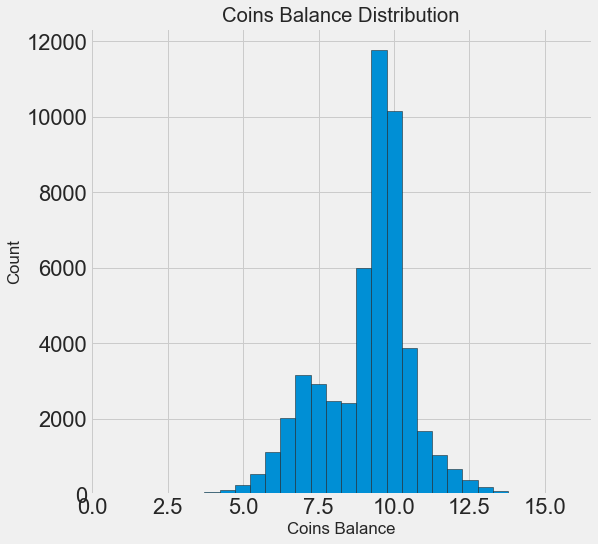

In [36]:
figsize(8,8)

# Histogram
plt.hist(df.COINSBALANCE[df['COINSBALANCE'] != 0].dropna().apply(np.log), bins=30, edgecolor='k');
plt.xlabel('Coins Balance');plt.ylabel('Count');
plt.title('Coins Balance Distribution')

## Looking for Relationships

In [37]:
# Target variable value counts
churn = df['CHURNED'].value_counts()

In [38]:
# Create a list of churned types
types = list(churn.index)

In [39]:
types

[1, 0]

In [40]:
# Define a function plot density

def kdeplot(col: str): # col is column name
    # Create a new figure
    plt.figure()

    for type in types:
        # Select churn type
        subset = df[df['CHURNED'] == type]

        if type == 1:
            label = 'Churned'
        else:
            label = 'Not Churned'

        # Density plot
        sns.kdeplot(subset[col].dropna(),
                   label = label, shade = False, alpha = 0.8);
    # label the plot
    plt.xlabel(col, SIZE = 20); plt.ylabel('Density', size=20);
    plt.title('Density Plot of ' + col, size=20)

## Life Time kde Plot
* Users existing less than 100 days are more tend to churn
* Users stayed longer are tend to NOT churn

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


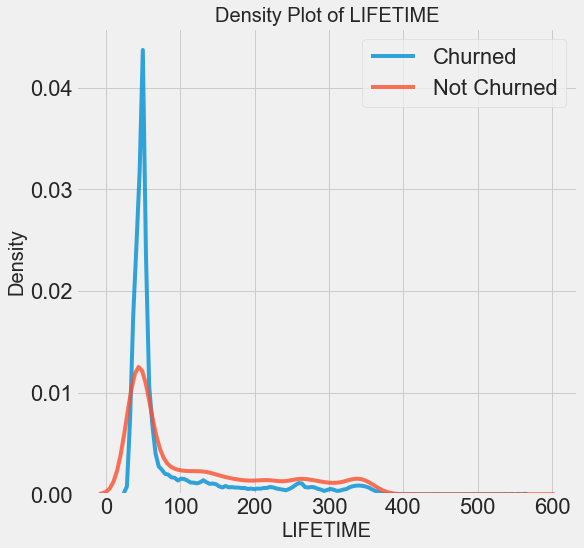

In [41]:
kdeplot('LIFETIME')

## Total Play Days kde Plot

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


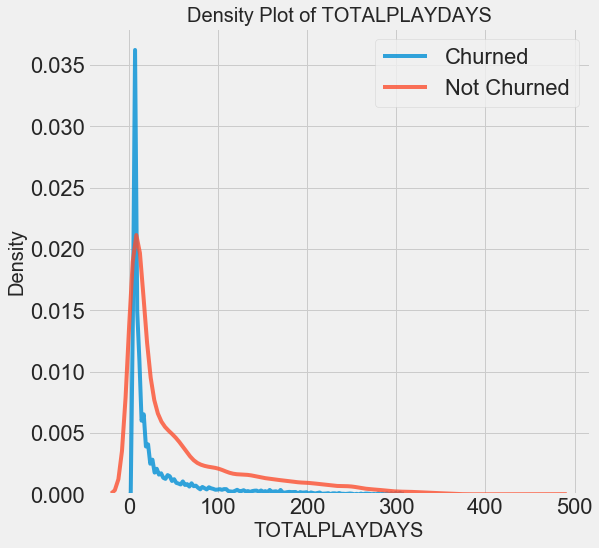

In [42]:
kdeplot('TOTALPLAYDAYS')

## Total In App Purchase kde Plot
* User made more in App purchade tend to not churn

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


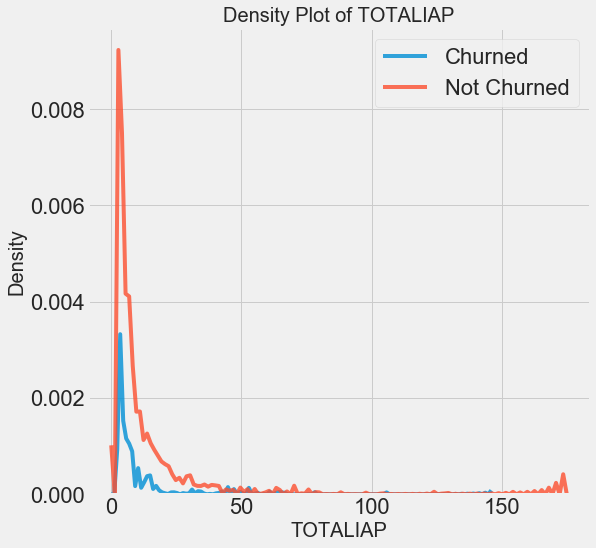

In [43]:
kdeplot('TOTALIAP')

## Total IAP Value kde Plot
* User spent money are tend to Not churn

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


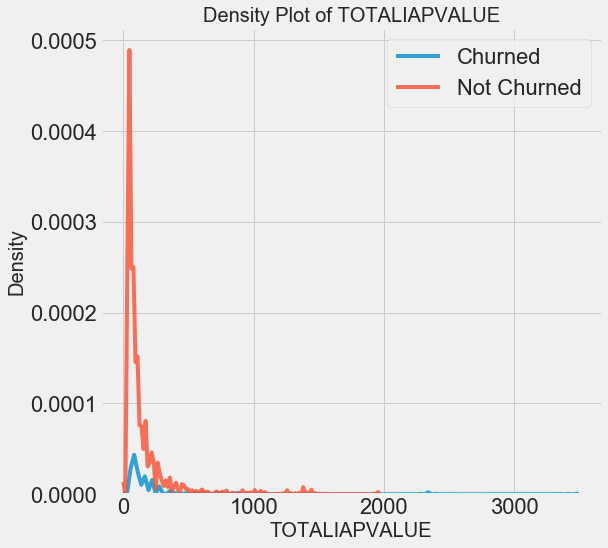

In [44]:
kdeplot('TOTALIAPVALUE')

## Total Reward Video kde Plot
* User watched more rewrd video tend to Not churn

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


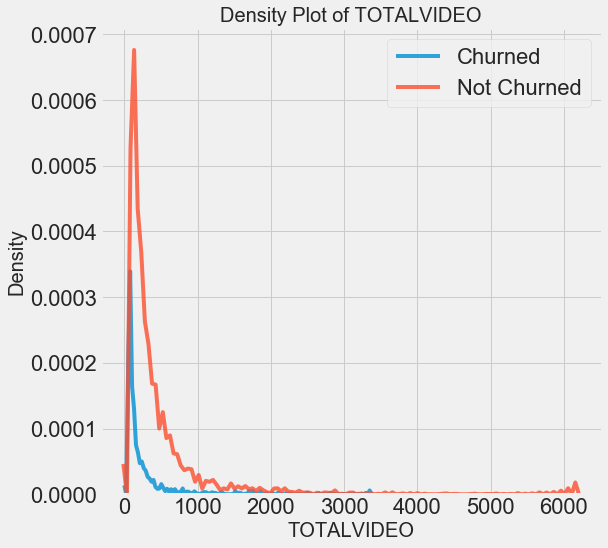

In [45]:
kdeplot('TOTALVIDEO')

## Generate all the rest kde plots

C:\Users\Yang\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


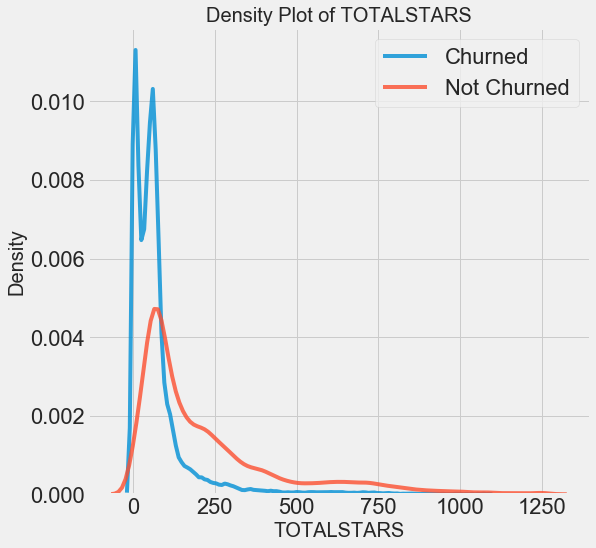

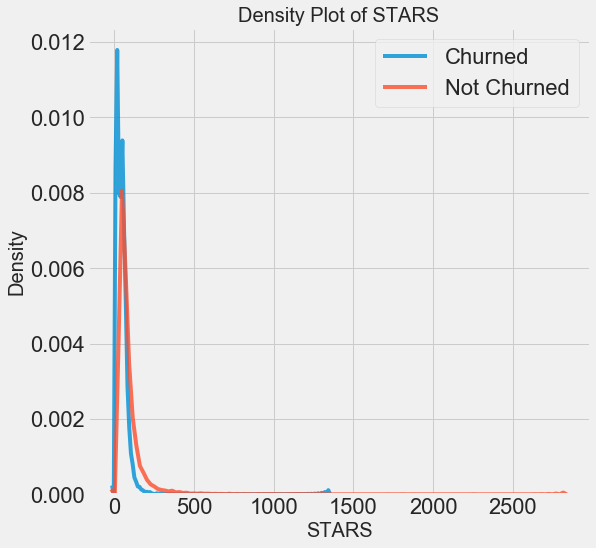

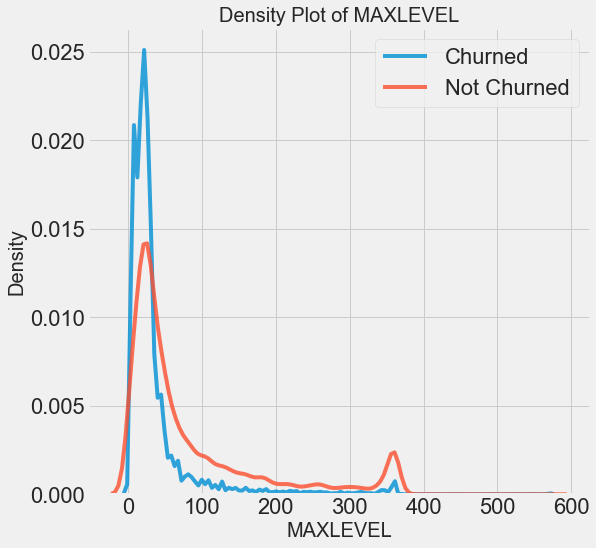

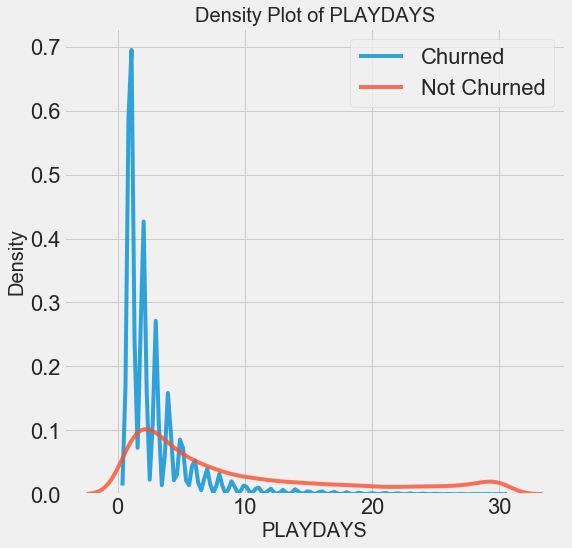

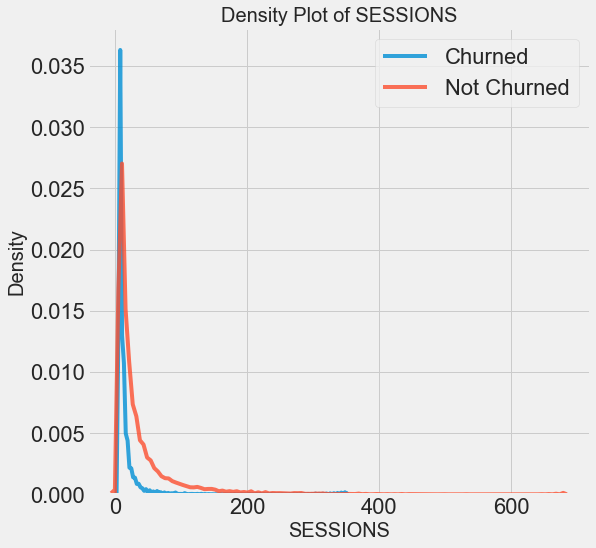

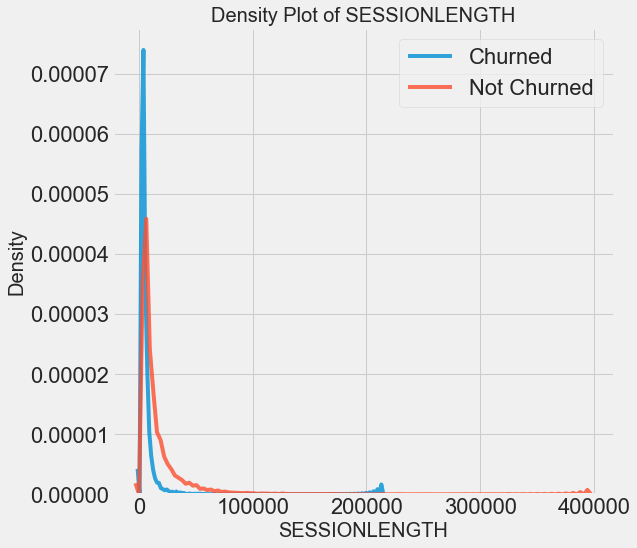

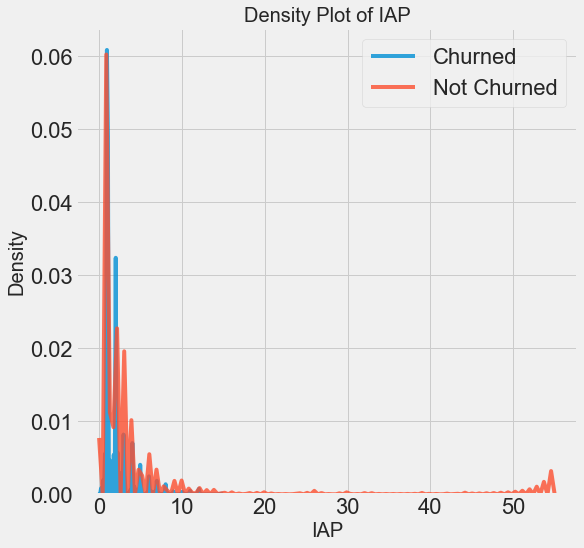

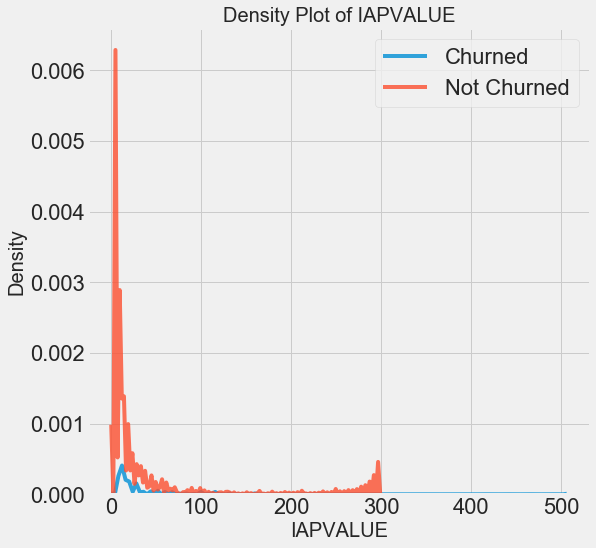

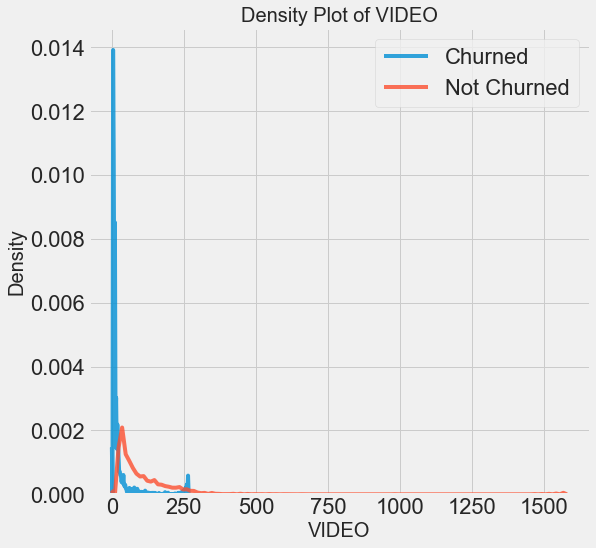

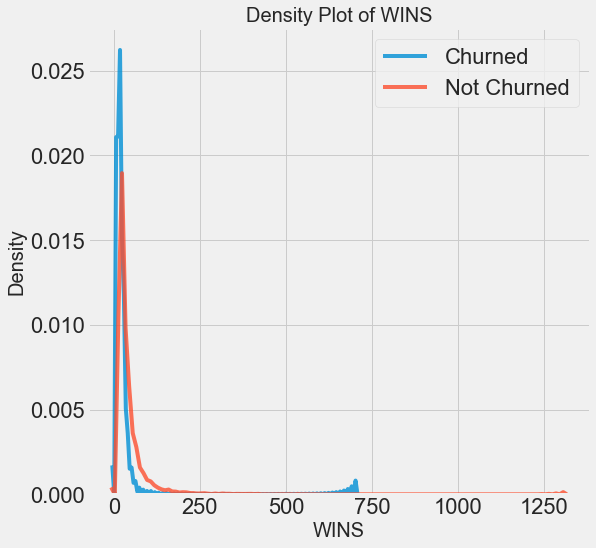

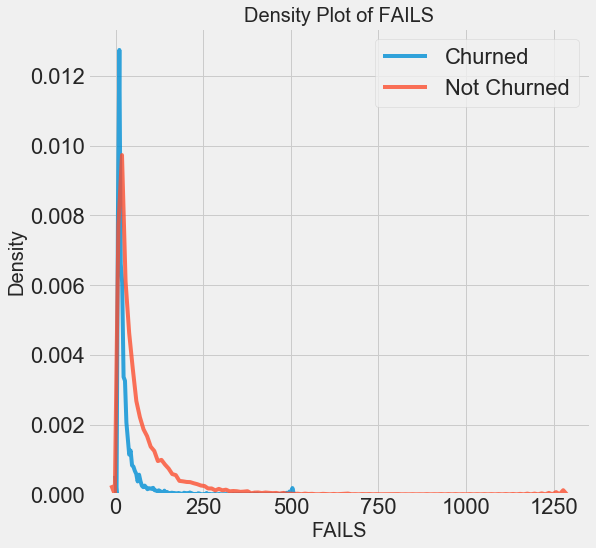

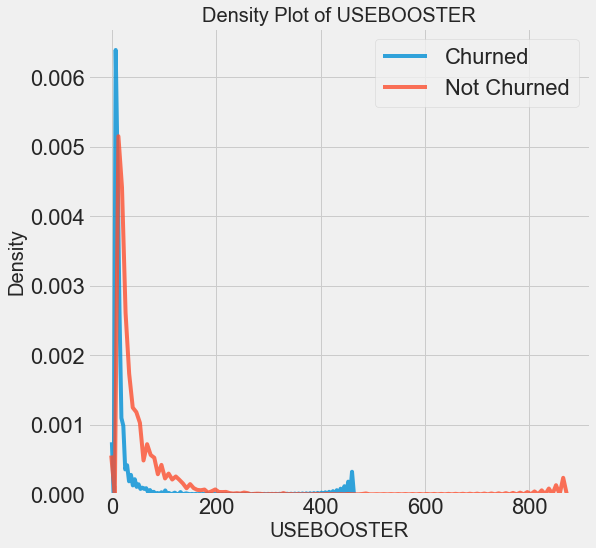

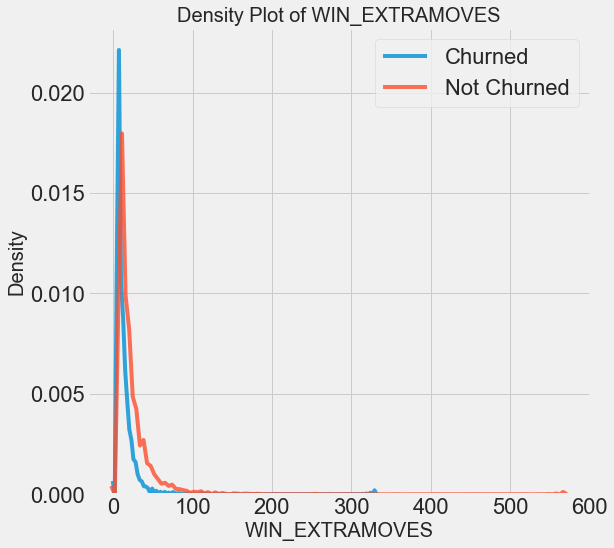

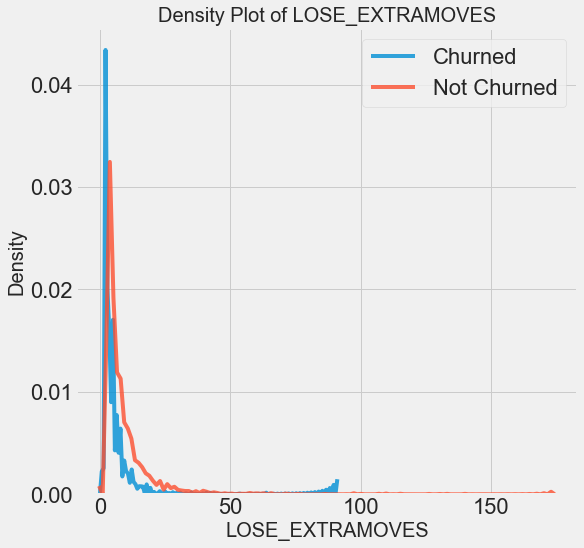

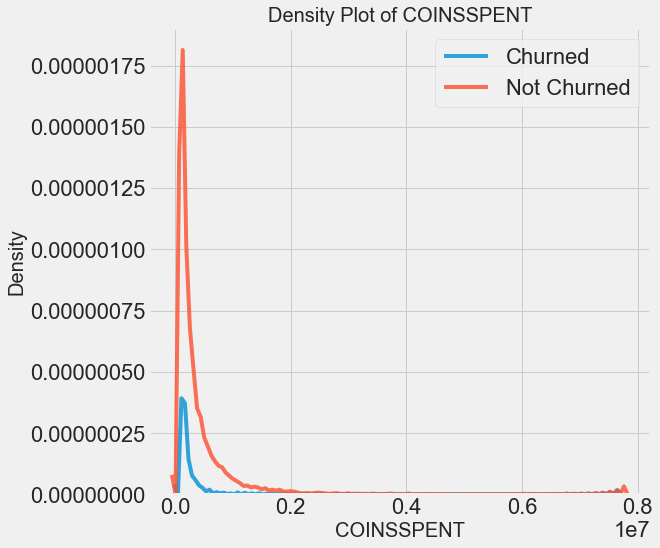

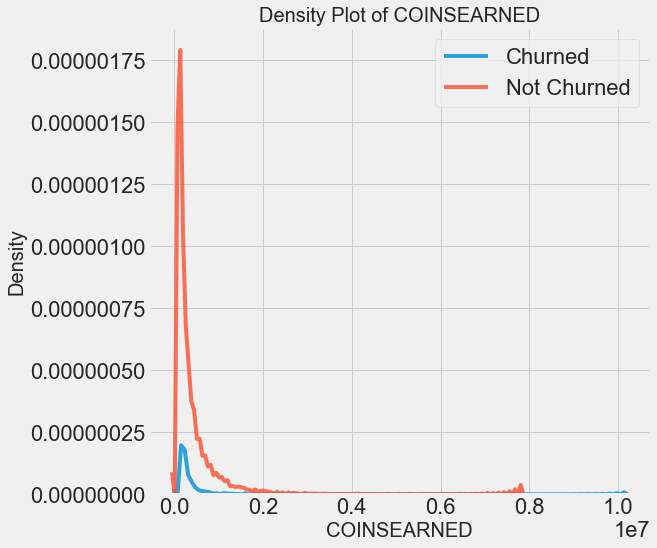

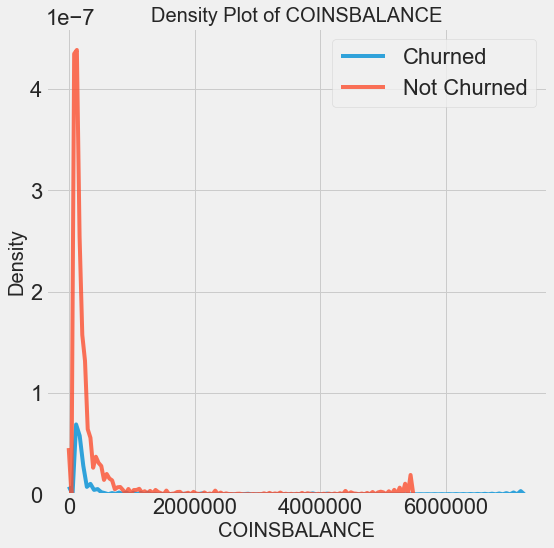

In [46]:
for col in list(df.columns)[6:-1]:
    kdeplot(col)

## Correlations between Features and Target

In [47]:
# correlation table
df.corr()

,FBCONNECT,LIFETIME,TOTALPLAYDAYS,TOTALIAP,TOTALIAPVALUE,TOTALVIDEO,TOTALSTARS,STARS,MAXLEVEL,PLAYDAYS,SESSIONS,SESSIONLENGTH,IAP,IAPVALUE,VIDEO,WINS,FAILS,USEBOOSTER,WIN_EXTRAMOVES,LOSE_EXTRAMOVES,COINSSPENT,COINSEARNED,COINSBALANCE,CHURNED
FBCONNECT,1.000000,0.125226,0.127033,0.061520,0.044970,0.117033,0.222849,0.164280,0.190426,0.186519,0.137255,0.141876,0.059112,0.048052,0.141007,0.165474,0.138110,0.135806,0.166129,0.123748,0.150913,0.150015,0.052014,-0.132901
LIFETIME,0.125226,1.000000,0.706889,0.101168,0.077758,0.234568,0.539792,-0.071729,0.576790,0.320230,0.178784,0.113592,0.014880,0.020626,0.153993,-0.004947,0.192673,0.165154,-0.010980,-0.011298,0.199867,0.195424,0.102820,-0.210314
TOTALPLAYDAYS,0.127033,0.706889,1.000000,0.155106,0.112027,0.431812,0.805727,0.160516,0.811626,0.697827,0.489432,0.378956,0.068928,0.064125,0.364061,0.239244,0.465801,0.356939,0.130217,0.098383,0.468844,0.462692,0.162257,-0.384027
TOTALIAP,0.061520,0.101168,0.155106,1.000000,0.772262,0.139569,0.279936,0.171725,0.248122,0.143382,0.139619,0.217335,0.562098,0.516985,0.132317,0.207630,0.179440,0.237275,0.245062,0.196534,0.355316,0.361044,0.095031,-0.079587
TOTALIAPVALUE,0.044970,0.077758,0.112027,0.772262,1.000000,0.097629,0.222629,0.119715,0.201062,0.097918,0.089588,0.150085,0.404380,0.515392,0.087380,0.145142,0.114988,0.194742,0.182978,0.134867,0.283322,0.302820,0.124084,-0.054495
TOTALVIDEO,0.117033,0.234568,0.431812,0.139569,0.097629,1.000000,0.486662,0.313201,0.428438,0.412807,0.478316,0.467449,0.077753,0.062122,0.663539,0.372079,0.385429,0.519096,0.236781,0.187400,0.470463,0.477135,0.184250,-0.180273
TOTALSTARS,0.222849,0.539792,0.805727,0.279936,0.222629,0.486662,1.000000,0.371435,0.907610,0.656321,0.564042,0.520939,0.179107,0.163882,0.441252,0.435281,0.577937,0.468696,0.229239,0.157333,0.614288,0.606556,0.197387,-0.385296
STARS,0.164280,-0.071729,0.160516,0.171725,0.119715,0.313201,0.371435,1.000000,0.255865,0.410341,0.521809,0.782928,0.282638,0.239445,0.488241,0.973748,0.589386,0.528174,0.498061,0.375414,0.706440,0.689945,0.113402,-0.191861
MAXLEVEL,0.190426,0.576790,0.811626,0.248122,0.201062,0.428438,0.907610,0.255865,1.000000,0.613451,0.487898,0.436143,0.144936,0.138965,0.377500,0.325509,0.505692,0.399495,0.170343,0.111174,0.551892,0.542272,0.183550,-0.308460
PLAYDAYS,0.186519,0.320230,0.697827,0.143382,0.097918,0.412807,0.656321,0.410341,0.613451,1.000000,0.759144,0.627883,0.153273,0.131057,0.538236,0.498436,0.702883,0.477018,0.356593,0.276666,0.662858,0.651347,0.146023,-0.442843


In [48]:
# correlation table in color
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,FBCONNECT,LIFETIME,TOTALPLAYDAYS,TOTALIAP,TOTALIAPVALUE,TOTALVIDEO,TOTALSTARS,STARS,MAXLEVEL,PLAYDAYS,SESSIONS,SESSIONLENGTH,IAP,IAPVALUE,VIDEO,WINS,FAILS,USEBOOSTER,WIN_EXTRAMOVES,LOSE_EXTRAMOVES,COINSSPENT,COINSEARNED,COINSBALANCE,CHURNED
FBCONNECT,1,0.13,0.13,0.062,0.045,0.12,0.22,0.16,0.19,0.19,0.14,0.14,0.059,0.048,0.14,0.17,0.14,0.14,0.17,0.12,0.15,0.15,0.052,-0.13
LIFETIME,0.13,1,0.71,0.1,0.078,0.23,0.54,-0.072,0.58,0.32,0.18,0.11,0.015,0.021,0.15,-0.0049,0.19,0.17,-0.011,-0.011,0.2,0.2,0.1,-0.21
TOTALPLAYDAYS,0.13,0.71,1,0.16,0.11,0.43,0.81,0.16,0.81,0.7,0.49,0.38,0.069,0.064,0.36,0.24,0.47,0.36,0.13,0.098,0.47,0.46,0.16,-0.38
TOTALIAP,0.062,0.1,0.16,1,0.77,0.14,0.28,0.17,0.25,0.14,0.14,0.22,0.56,0.52,0.13,0.21,0.18,0.24,0.25,0.2,0.36,0.36,0.095,-0.08
TOTALIAPVALUE,0.045,0.078,0.11,0.77,1,0.098,0.22,0.12,0.2,0.098,0.09,0.15,0.4,0.52,0.087,0.15,0.11,0.19,0.18,0.13,0.28,0.3,0.12,-0.054
TOTALVIDEO,0.12,0.23,0.43,0.14,0.098,1,0.49,0.31,0.43,0.41,0.48,0.47,0.078,0.062,0.66,0.37,0.39,0.52,0.24,0.19,0.47,0.48,0.18,-0.18
TOTALSTARS,0.22,0.54,0.81,0.28,0.22,0.49,1,0.37,0.91,0.66,0.56,0.52,0.18,0.16,0.44,0.44,0.58,0.47,0.23,0.16,0.61,0.61,0.2,-0.39
STARS,0.16,-0.072,0.16,0.17,0.12,0.31,0.37,1,0.26,0.41,0.52,0.78,0.28,0.24,0.49,0.97,0.59,0.53,0.5,0.38,0.71,0.69,0.11,-0.19
MAXLEVEL,0.19,0.58,0.81,0.25,0.2,0.43,0.91,0.26,1,0.61,0.49,0.44,0.14,0.14,0.38,0.33,0.51,0.4,0.17,0.11,0.55,0.54,0.18,-0.31
PLAYDAYS,0.19,0.32,0.7,0.14,0.098,0.41,0.66,0.41,0.61,1,0.76,0.63,0.15,0.13,0.54,0.5,0.7,0.48,0.36,0.28,0.66,0.65,0.15,-0.44


In [49]:
# Find the correlation with target and sort
churn_corr = df.corr()['CHURNED'].sort_values()

# print churn correlation
print(churn_corr)

PLAYDAYS          -0.442843
TOTALSTARS        -0.385296
TOTALPLAYDAYS     -0.384027
MAXLEVEL          -0.308460
SESSIONS          -0.293314
FAILS             -0.289779
COINSSPENT        -0.265765
SESSIONLENGTH     -0.258700
COINSEARNED       -0.258289
WINS              -0.224976
LIFETIME          -0.210314
VIDEO             -0.201651
STARS             -0.191861
USEBOOSTER        -0.185894
WIN_EXTRAMOVES    -0.183580
TOTALVIDEO        -0.180273
LOSE_EXTRAMOVES   -0.137700
FBCONNECT         -0.132901
TOTALIAP          -0.079587
IAP               -0.071023
COINSBALANCE      -0.066684
IAPVALUE          -0.058674
TOTALIAPVALUE     -0.054495
CHURNED            1.000000
Name: CHURNED, dtype: float64


* The features have high correlation with target are: PLAYDAYS, TOTALSTARS, TOTALPLAYDAYS, MAXLEVEL, SESSIONS.
* TOTALPLAYDAYS are highly correlated to SESSIONS, correlation is 0.76
* TOTALSTARS are highly correlated to TOTALPLAYDAYS, correlation is 0.81
* TOTALSTARS are highly correlated to MAXLEVEL, correlation is 0.91
* TOTALPLAYEDAYS are highly correlated to MAXLEVEL, correlation is 0.81

* TOTALIAP and TOTALIAPVALUE, correlation is 0.77
* TOTALVIDEO and VIDEO, correlation is 0.66
* STARS and WINS, correlation is 0.97
* IAP and IAPVALUE, correlation is 0.82
* SESSIONLENGTH and WINS, correlation is 0.85
* SESSIONLENGTH and FAILS, correlation is 0.86
* WIN_EXTRAMOVES and LOSE_EXTRAMOVES, correlation is 0.68
* COINSEARED and COINSSPENT, correlation is 0.97
* COINSSPENT and SESSTIONLENGTH, correlation is 0.86

For features strongly correlated to each other, removing one to get rid of collinear. This helps a machine learning model geralize and be more interpretable. 
* Remove TOTALPLAYDAYS, MAXLEVEL, SESSIONS
* Remove TOTALIAPVALUE
* Remove TOTALVIDEO
* Remove STARS
* Remove IAPVALUE
* Remove COINSEARNED, COINSSPENT
* Remove WINS, FAILS

To account for possible non-linear relationships, we take log and square root trandformation of the features and then calculate the correlation score.

In [50]:
# Create df subset equals to df
df_subset = df.copy()

In [51]:
# Create columns with square root and log of numerical columns
for col in df_subset.columns:
    if col == 'CHURNED':
        pass
    else:
        df_subset['SQRT_'+ col] = np.sqrt(df_subset[col][df_subset[col]>=0])
        df_subset['SQRT_'+ col].fillna(0)
        df_subset['LOG_'+ col] = np.log(df_subset[col][df_subset[col] > 0])
        df_subset['LOG_'+ col].fillna(0)

In [52]:
# Display most negative correlation
df_subset.corr()['CHURNED'].sort_values().head(30)

LOG_TOTALPLAYDAYS    -0.583188
SQRT_TOTALPLAYDAYS   -0.484751
LOG_PLAYDAYS         -0.484013
SQRT_PLAYDAYS        -0.475734
SQRT_TOTALSTARS      -0.458695
LOG_TOTALSTARS       -0.456712
LOG_SESSIONS         -0.449010
PLAYDAYS             -0.442843
SQRT_SESSIONS        -0.399655
LOG_COINSEARNED      -0.392344
SQRT_COINSSPENT      -0.389793
SQRT_FAILS           -0.386949
LOG_MAXLEVEL         -0.386884
TOTALSTARS           -0.385296
SQRT_COINSEARNED     -0.384329
TOTALPLAYDAYS        -0.384027
LOG_COINSSPENT       -0.383483
SQRT_MAXLEVEL        -0.368070
LOG_SESSIONLENGTH    -0.357968
SQRT_SESSIONLENGTH   -0.351630
LOG_FAILS            -0.349501
LOG_TOTALVIDEO       -0.321430
SQRT_TOTALVIDEO      -0.321132
MAXLEVEL             -0.308460
SESSIONS             -0.293314
LOG_VIDEO            -0.291285
FAILS                -0.289779
SQRT_WINS            -0.284173
SQRT_VIDEO           -0.275983
SQRT_USEBOOSTER      -0.272578
Name: CHURNED, dtype: float64

The log operation on TOTALPLAYDAYS, PLAYDAYS, TOTALSTARS seem to have result in stronger correlation.

# $\rm III.$ Feature Engineering and Selection

For feature engineering, we will do the following:
* Add in the log transformation of the numerical variables

For feature selection, we will do the following:
* Remove collinear features

In [53]:
# Define function to return columns need to be delete to avoid collinear
def remove_high_corr_columns(dataset, threshold):
    col_to_delete = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_to_delete.add(colname)            

    return col_to_delete

In [54]:
# Return columns have correation more than 0.8
cols_need_delete = remove_high_corr_columns(df, 0.80)

# print
print(cols_need_delete)

{'MAXLEVEL', 'FAILS', 'IAPVALUE', 'COINSSPENT', 'WINS', 'COINSEARNED', 'TOTALSTARS'}


<code>
# Define function return columns need to dropped to avoid collinear
def remove_high_corr_columns(dataset, threshold, target):
    col_to_delete = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname_i = corr_matrix.columns[i] # getting the name of column
                colname_j = corr_matrix.columns[j]
                if abs(corr_matrix[target][colname_i]) >= abs(corr_matrix[target][colname_j]):
                    colname = colname_j
                else:
                    colname = colname_i
                
                col_to_delete.add(colname)            

    return col_to_delete

In [55]:
# delete columns to avoid collinear
df.drop(columns=list(cols_need_delete), inplace=True)

In [56]:
# Compute Correlation with target
df.corr()['CHURNED'].sort_values()

PLAYDAYS          -0.442843
TOTALPLAYDAYS     -0.384027
SESSIONS          -0.293314
SESSIONLENGTH     -0.258700
LIFETIME          -0.210314
VIDEO             -0.201651
STARS             -0.191861
USEBOOSTER        -0.185894
WIN_EXTRAMOVES    -0.183580
TOTALVIDEO        -0.180273
LOSE_EXTRAMOVES   -0.137700
FBCONNECT         -0.132901
TOTALIAP          -0.079587
IAP               -0.071023
COINSBALANCE      -0.066684
TOTALIAPVALUE     -0.054495
CHURNED            1.000000
Name: CHURNED, dtype: float64

In [57]:
# log operation
log_list = ['PLAYDAYS', 'TOTALPLAYDAYS', 'SESSIONS', 'SESSIONLENGTH', 'TOTALVIDEO']
# Create columns with square root and log of numerical columns
for col in log_list:
    if col == 'CHURNED':
        pass
    else:
        df['LOG_'+ col] = np.log(df[col][df[col] > 0])

In [58]:
# fillna with zero
df = df.fillna(0)

In [59]:
# Compute Correlation with target
df.corr()['CHURNED'].sort_values()

LOG_TOTALPLAYDAYS   -0.583188
LOG_PLAYDAYS        -0.484013
LOG_SESSIONS        -0.449010
PLAYDAYS            -0.442843
LOG_TOTALVIDEO      -0.403428
TOTALPLAYDAYS       -0.384027
SESSIONS            -0.293314
LOG_SESSIONLENGTH   -0.293135
SESSIONLENGTH       -0.258700
LIFETIME            -0.210314
VIDEO               -0.201651
STARS               -0.191861
USEBOOSTER          -0.185894
WIN_EXTRAMOVES      -0.183580
TOTALVIDEO          -0.180273
LOSE_EXTRAMOVES     -0.137700
FBCONNECT           -0.132901
TOTALIAP            -0.079587
IAP                 -0.071023
COINSBALANCE        -0.066684
TOTALIAPVALUE       -0.054495
CHURNED              1.000000
Name: CHURNED, dtype: float64

The log operation makes the feature corellation with the target stronger.

In [60]:
# Delete columns to avoid collinear
df.drop(columns=log_list, inplace=True)

In [61]:
missing_values_table(df)

Your slelected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Split Into Training and Testing Sets

In [62]:
# Define features X and target y
X = df.drop(columns=['CHURNED']).values
y = df.CHURNED.values

In [63]:
# Split into 70% traing and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21)

# $\rm IV. $ Evaluating and Comparing Machine Learning Models

## Scaling Features

In [64]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the training data
scaler.fit(X_train)

# Transform on both training and testig data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Models to Evaluate
We will compare five different machine learning models using Scikit-Learn:
1. KNN
2. Logistic Regression
3. Decision Tree
4. Support Vector Machine (SVM)
5. Gradient Boosting Classifier

* KNN

In [65]:
# Create knn classifier object
knn = KNeighborsClassifier()

In [66]:
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
# Make predictions on testing data
y_pred = knn.predict(X_test)

In [68]:
# Evaluate Model accuracy
knn_score = knn.score(X_test, y_test)
# Print score
print(knn_score)

0.8485818847209515


* Define a Function to Evaluate Model Accuracy

In [69]:
def fit_and_evaluate(model, model_name:str):
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    model_pred = model.predict(X_test)
    
    # Model Accuracy Score
    model_score = model.score(X_test, y_test)*100
    
    print(model_name, 'model accuracy score is {0: .2f}%'.format(model_score))
    
    return model_score

In [70]:
knn_score = fit_and_evaluate(knn, 'knn')

knn model accuracy score is  84.86%


* Logistic Regression

In [71]:
log_reg = LogisticRegression()

In [72]:
log_reg_score = fit_and_evaluate(log_reg, 'Logistic Regression')

Logistic Regression model accuracy score is  78.87%


* Decision Tree

In [73]:
tree = DecisionTreeClassifier()

In [74]:
tree_score = fit_and_evaluate(tree, 'Decision Tree Classifier')

Decision Tree Classifier model accuracy score is  84.02%


* Support Vector Machine

In [75]:
svc = SVC()

In [76]:
svc_score = fit_and_evaluate(svc, 'Support Vector Classifier')

Support Vector Classifier model accuracy score is  80.39%


* Gradient Boosting

In [77]:
gradient_boost = GradientBoostingClassifier()

In [78]:
gradient_boost_score = fit_and_evaluate(gradient_boost, 'Gradient Boosting Classifier')

Gradient Boosting Classifier model accuracy score is  87.24%


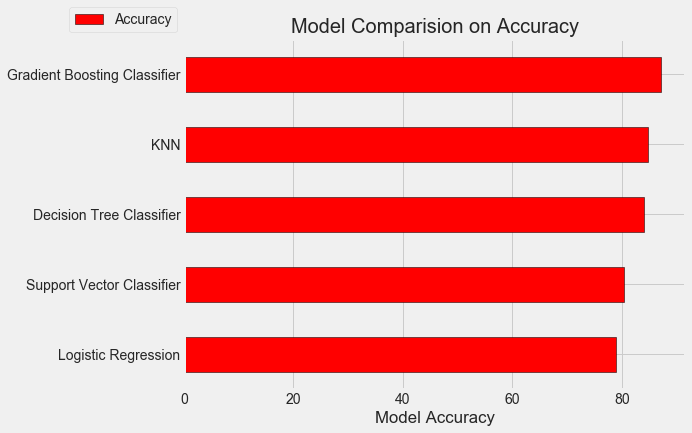

In [79]:
# Plot differenct model accuracy score

plt.style.use('fivethirtyeight')
figsize(8,6)

# Create dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['KNN', 'Logistic Regression', 'Decision Tree Classifier', 
                                           'Support Vector Classifier', 'Gradient Boosting Classifier'],
                                  'Accuracy': [knn_score, log_reg_score, tree_score, svc_score, gradient_boost_score]})

# Horizontal bar chart of test accuracy
model_comparison.sort_values('Accuracy', ascending=True).plot(x = 'model', y = 'Accuracy', kind = 'barh',
                                                              color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('Model Accuracy');
plt.xticks(size = 14);
plt.legend(loc = 'lower right', bbox_to_anchor=(0, 1), fontsize=14)
plt.title('Model Comparision on Accuracy', size=20);

Gradient Boosting Classifier has the best performance.

# $\rm V. $ Model Optimization: Hyperparameter Tuning

In [80]:
# loss function to be optimized
loss = ['deviance', 'exponential']

In [81]:
# learning rate
learning_rate = [0.02, 0.01]

In [82]:
# number of trees
n_estimators = [100, 200, 500, 1000, 1500]

In [83]:
# maximum depth of the individual regression estimator
max_depth = [3, 4, 5, 6, 7, 8]

In [84]:
# The minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10, 20, 40]

In [85]:
# The minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 3, 5, 7, 8]

In [86]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'learning_rate': learning_rate,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf}

In [87]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingClassifier(random_state=21)

In [88]:
# Gridsearch Cross Validation with 5-folds
random_cv = RandomizedSearchCV(estimator = model, param_distributions=hyperparameter_grid, cv = 5, random_state=21)

In [89]:
%%time
# Fit on the training data
random_cv.fit(X_train, y_train)

Wall time: 20min 46s


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'loss': ['deviance', 'exponential'], 'learning_rate': [0.02, 0.01], 'n_estimators': [100, 200, 500, 1000, 1500], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10, 20, 40], 'min_samples_leaf': [1, 3, 5, 7, 8]},
          pre_dispatch='2*n_jobs', random_state=21, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [90]:
# Best estimator
random_cv.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=40,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [91]:
# Best score
random_cv.best_score_

0.884970871611024

In [92]:
# Best parameters
random_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 40,
 'min_samples_leaf': 8,
 'max_depth': 6,
 'loss': 'exponential',
 'learning_rate': 0.01}

## Evaluate Final Model on the Test Set

In [93]:
# select the best model
best_model = random_cv.best_estimator_

best_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=40,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [94]:
%%time
# best model fit on the train data
best_model.fit(X_train, y_train)

Wall time: 52.9 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=8, min_samples_split=40,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=21, subsample=1.0, verbose=0,
              warm_start=False)

In [95]:
# predict on the test data
best_pred = best_model.predict(X_test)

In [96]:
# Accuracy score
best_accuracy = best_model.score(X_test, y_test)

# print best accuracy score
print(' Tuned Gradient Boosting model accuracy score is {0: .2f}%'.format(best_accuracy * 100))

 Tuned Gradient Boosting model accuracy score is  88.60%


In [97]:
# Classification report
print(classification_report(y_test, best_pred))

             precision    recall  f1-score   support

          0       0.86      0.92      0.89      7654
          1       0.91      0.85      0.88      7648

avg / total       0.89      0.89      0.89     15302



## ROC and AUC

In [98]:
# Predict probability
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [100]:
# AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# print auc score
print(auc_score)

0.961298454851184


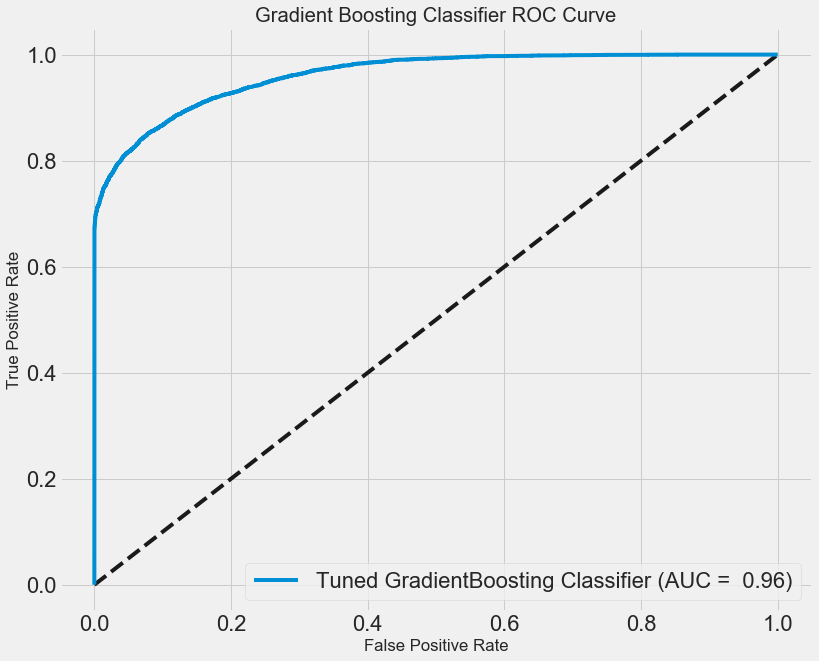

In [101]:
plt.style.use('fivethirtyeight')
figsize(12,10)

# ROC curve plot
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr, tpr, label='Tuned GradientBoosting Classifier (AUC = {: .2f})'.format(auc_score))
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.legend(loc='lower right')
_ = plt.title('Gradient Boosting Classifier ROC Curve')

# Interprete the Model

## Feature Importance

In [102]:
df.drop(columns=['CHURNED']).columns

Index(['FBCONNECT', 'LIFETIME', 'TOTALIAP', 'TOTALIAPVALUE', 'STARS', 'IAP',
       'VIDEO', 'USEBOOSTER', 'WIN_EXTRAMOVES', 'LOSE_EXTRAMOVES',
       'COINSBALANCE', 'LOG_PLAYDAYS', 'LOG_TOTALPLAYDAYS', 'LOG_SESSIONS',
       'LOG_SESSIONLENGTH', 'LOG_TOTALVIDEO'],
      dtype='object')

In [103]:
# Extract the feature importance into a dataframe
feature_results = pd.DataFrame({'Features': list(df.drop(columns=['CHURNED']).columns),
                               'Importance': best_model.feature_importances_})

feature_results = feature_results.sort_values('Importance', ascending=False).reset_index(drop=True)

feature_results

,Features,Importance
0,LOG_TOTALPLAYDAYS,0.275140
1,LOG_PLAYDAYS,0.147578
2,LIFETIME,0.143482
3,LOG_SESSIONLENGTH,0.097644
4,COINSBALANCE,0.078682
5,STARS,0.063105
6,LOG_SESSIONS,0.050861
7,LOG_TOTALVIDEO,0.044024
8,VIDEO,0.025253
9,USEBOOSTER,0.018527


Text(0.5,1,'Feature Importances from Random Forest')

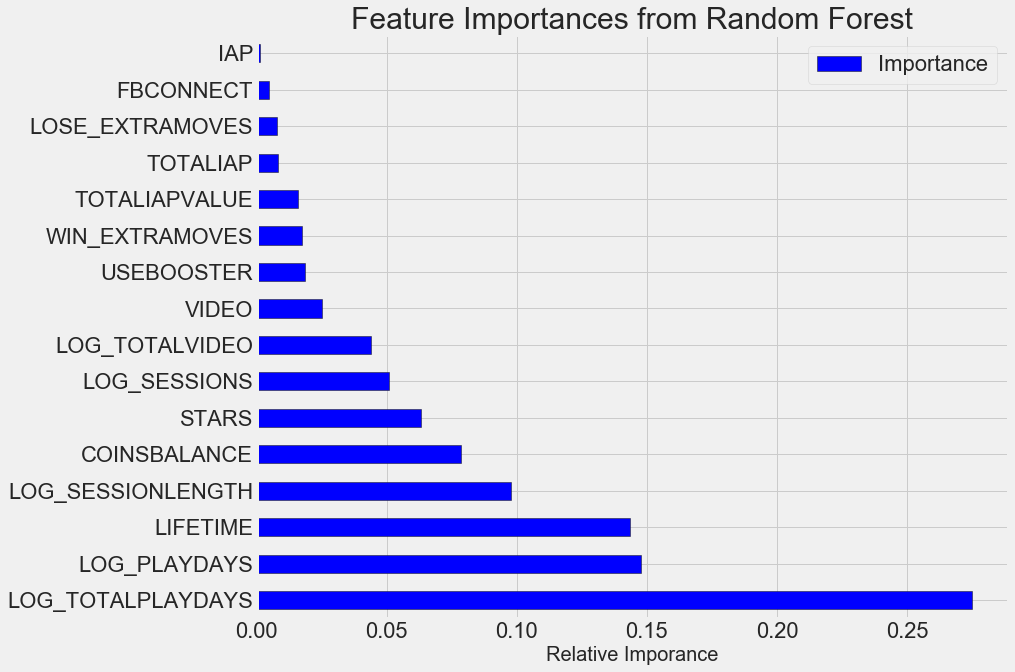

In [104]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot feature importance in horizontal bar chart
feature_results.plot(x = 'Features', y= 'Importance',
                    edgecolor='k',
                    kind='barh', color = 'blue');

plt.xlabel('Relative Imporance', size=20);
plt.ylabel('');
plt.title('Feature Importances from Random Forest', size=30)

# Examining a Sigle Decision Tree
We can not examine every tree(we have 1000 trees in our case), looking at a single one does give us some idea how our model make predictions.  

In [105]:
# import tree
from sklearn import tree

In [117]:
# Extract a single tree
single_tree = best_model.estimators_[1][0]
single_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=40,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x000001D4D9216E58>,
           splitter='best')

In [124]:
# save the tree as .dot file
dot_data = tree.export_graphviz(single_tree, out_file = None,
                    feature_names = df.drop(columns=['CHURNED']).columns,
                    filled=True,
                    rounded=True)

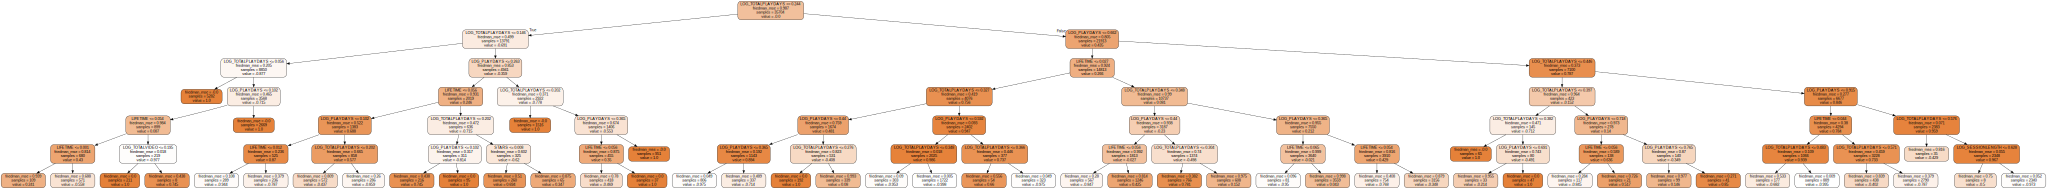

In [125]:
# Generate tree graph from dot_data
graph = graphviz.Source(dot_data)  
graph 

In [111]:
# output decision tree graph as pdf
graph.render('images/sigle_tree')

'images/sigle_tree.pdf'

# Local Interpretable Model-Agnostic Explanations (LIME)

In [148]:
# Find the probability residuals
residuals = abs(y_pred_prob - 1)  # y_pred_prob is the probability of the prediction is 1

In [149]:
# Extract the feature of the worst and best prediction
worst = X_test[np.argmax(residuals), :]  # np.argmax() returns the indices of the max value
best = X_test[np.argmin(residuals), :]

In [139]:
# Import LIME for prediction explaination
import lime

In [150]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train,
                                                  mode = 'regression',
                                                  training_labels = y_train,
                                                  feature_names = list(df.drop(columns=['CHURNED']).columns))

In [168]:
# define predict function
def predict_fn(arr: 'array'):
    prob = best_model.predict_proba(arr)[:,1]
    return prob

prediction: 8.626701016386154e-05


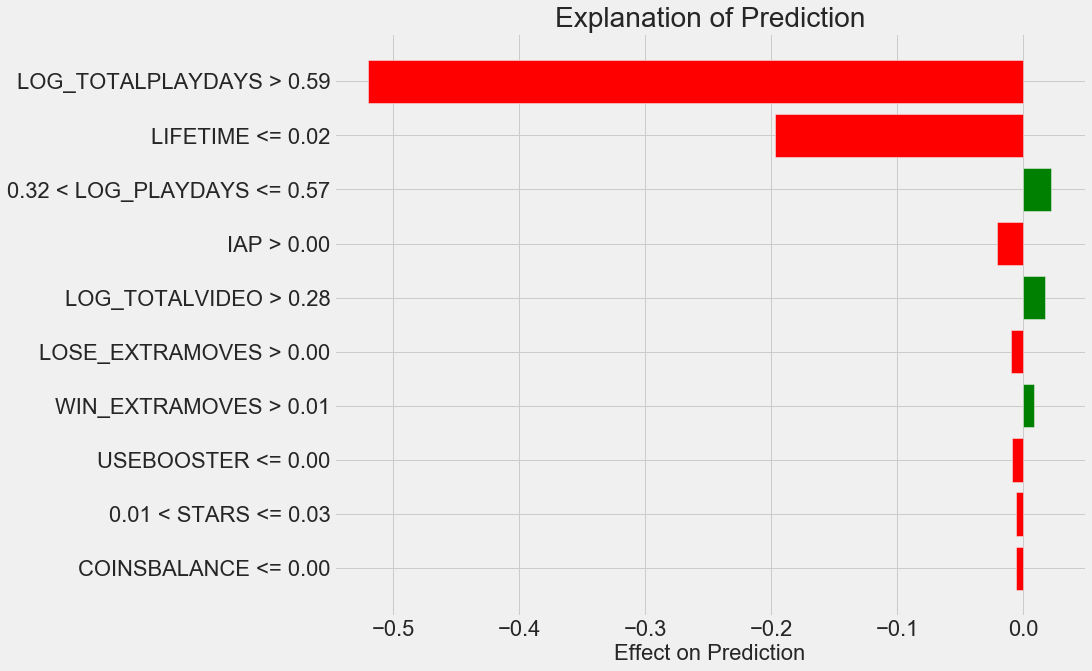

In [171]:
# Display the predicted and true value for the wrong instance
print('prediction: {}'.format(best_model.predict_proba(worst.reshape(1,-1))[0][1]))

# Explain the wrong prediction
worst_exp = explainer.explain_instance(data_row =  worst,
                                      predict_fn = predict_fn)

figsize(12, 10)
plt.style.use('fivethirtyeight')
# Plot the prediction explaiination
worst_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size=28);
plt.xlabel('Effect on Prediction', size=22);

prediction: 0.9999420406028228


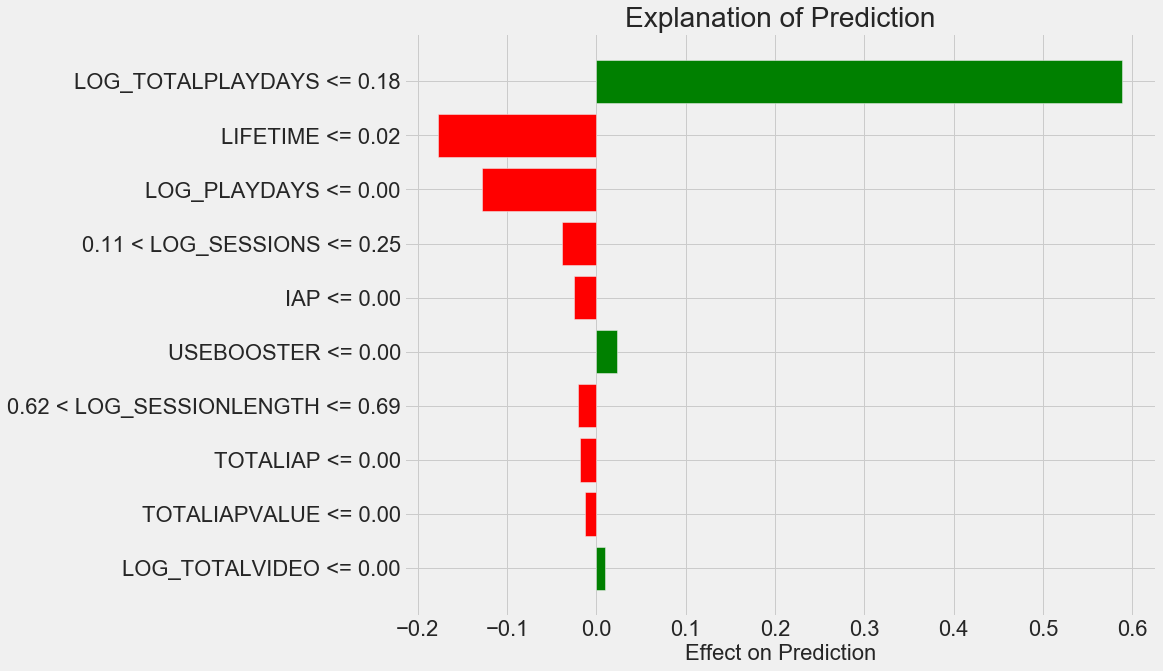

In [172]:
# Display the predicted and true value for the right instance
print('prediction: {}'.format(best_model.predict_proba(best.reshape(1,-1))[0][1]))

# Explain the wrong prediction
worst_exp = explainer.explain_instance(data_row =  best,
                                      predict_fn = predict_fn)

figsize(12, 10)
plt.style.use('fivethirtyeight')
# Plot the prediction explaiination
worst_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size=28);
plt.xlabel('Effect on Prediction', size=22);